In [9]:
!cat ../book*
!mkdir ../images
!ls ..

https://github.com/ageron/handson-ml
mkdir: ../images: File exists
09_up_and_running          13_convolutional
10_intro_to_artificial_nns bookGithubRepoURL.txt
11_training_deep_NNs       images


In [16]:
import numpy as np
import os
import tensorflow as tf
from sklearn.datasets import load_sample_image

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [7]:
# Where to save the figures
PROJECT_ROOT_DIR = '..'
CHAPTER_ID = '13_convolutional'

In [12]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

    
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(
        PROJECT_ROOT_DIR, 'images', CHAPTER_ID, fig_id + '.png')
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
    
def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis('off')

    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation='nearest')
    plt.axis('off')

In [17]:
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')

image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

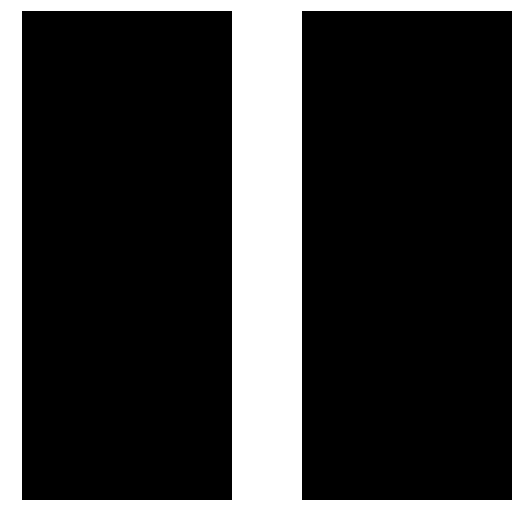

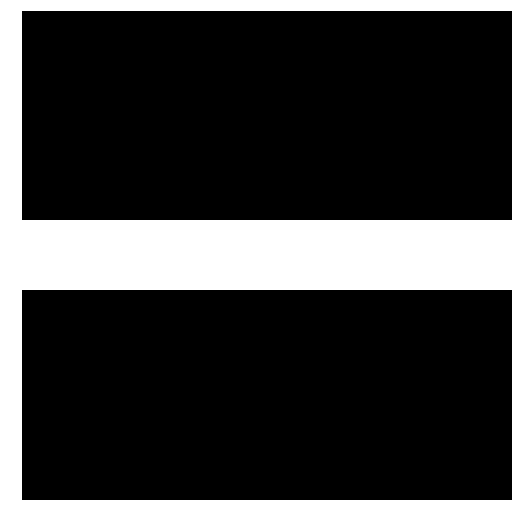

In [18]:
# Filters
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
fmap[:, :, 0, 0]
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

In [19]:
reset_graph()

# Shape dims = (batch_size, h, w, chanels)
X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, 
                           feature_maps, 
                           strides=[1, 1, 1, 1], 
                           padding='SAME', 
                           use_cudnn_on_gpu=False)

In [20]:
with tf.Session() as s:
    output = convolution.eval(feed_dict={ X: images })

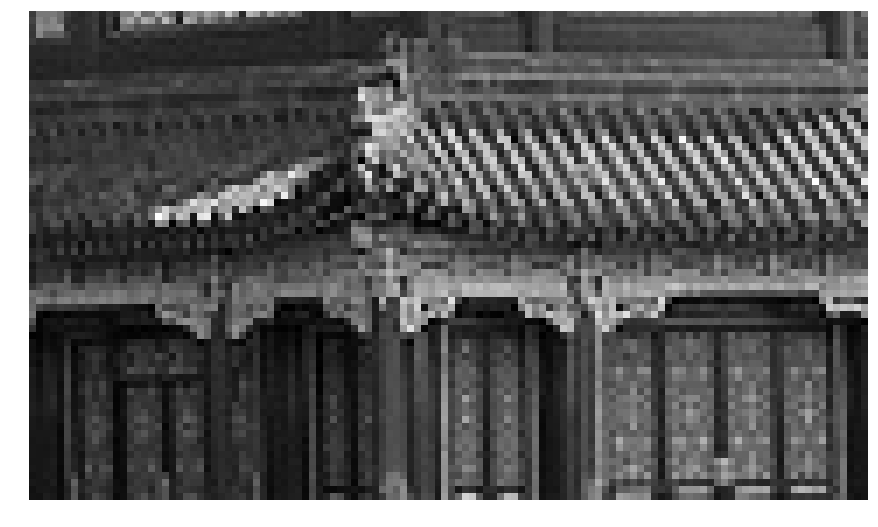

In [21]:
plot_image(images[0, :, :, 0])
#save_fig('china_original', tight_layout=False)
plt.show()

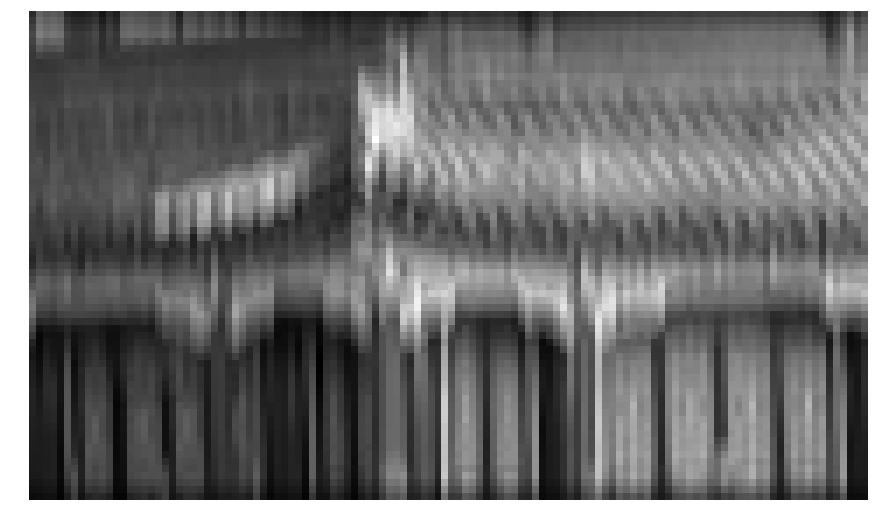

In [22]:
plot_image(output[0, :, :, 0])
#save_fig('china_vertical', tight_layout=False)
plt.show()

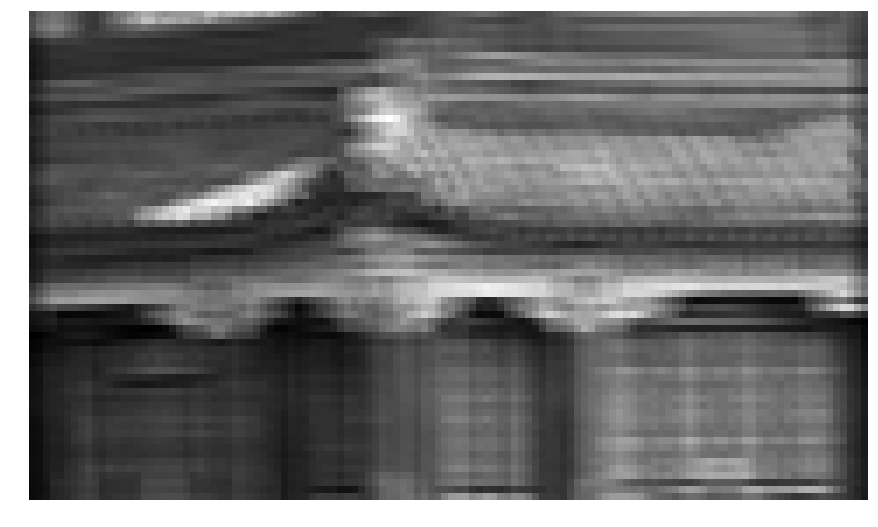

In [23]:
plot_image(output[0, :, :, 1])
#save_fig('china_horizontal', tight_layout=False)
plt.show()

In [24]:
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

In [26]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 
# filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(
    X, filters, strides=[1, 2, 2, 1], padding='SAME')

In [27]:
with tf.Session() as s:
    output = s.run(convolution, feed_dict={ X: dataset })

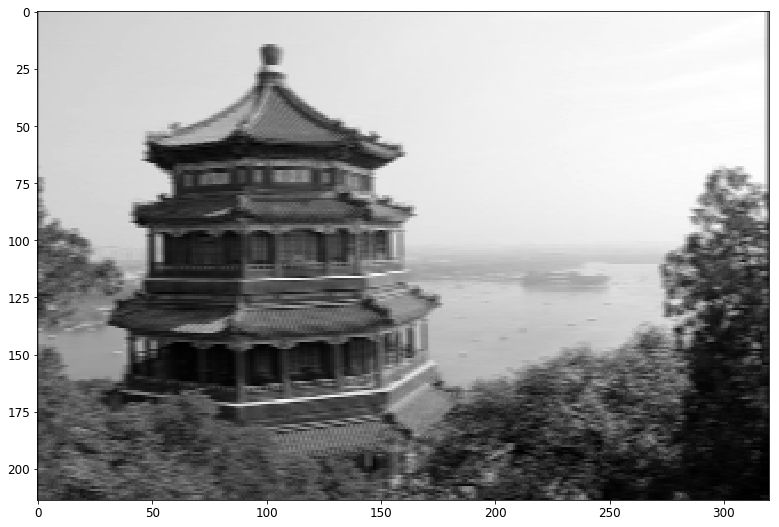

In [28]:
plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

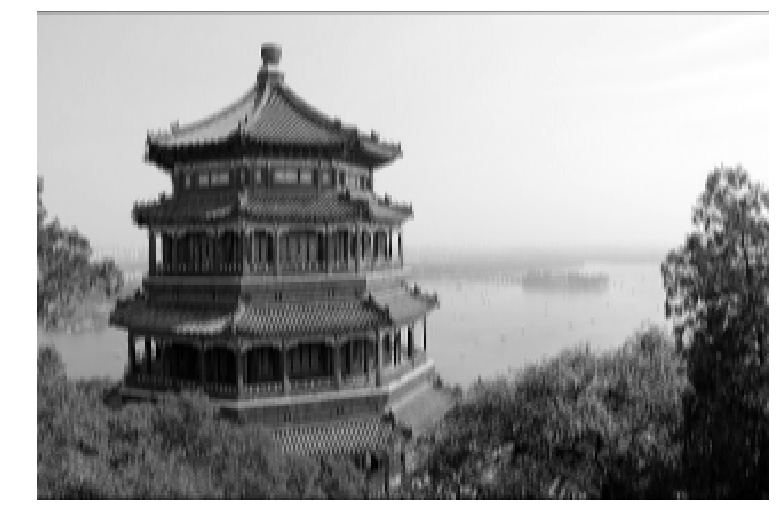

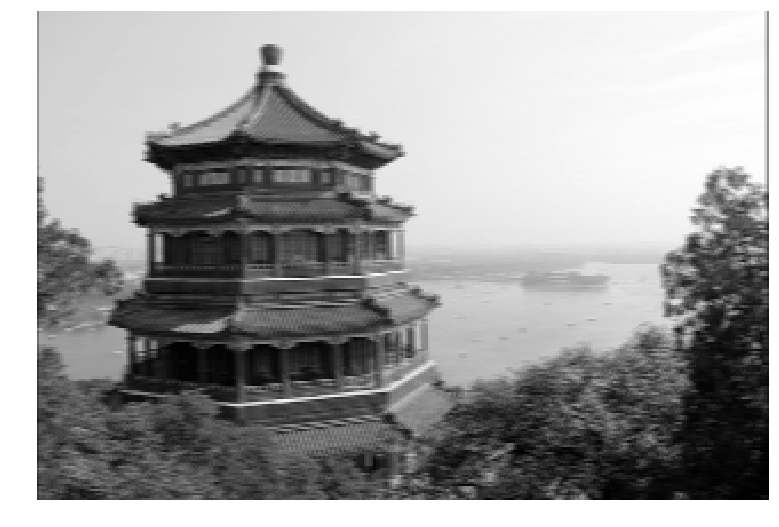

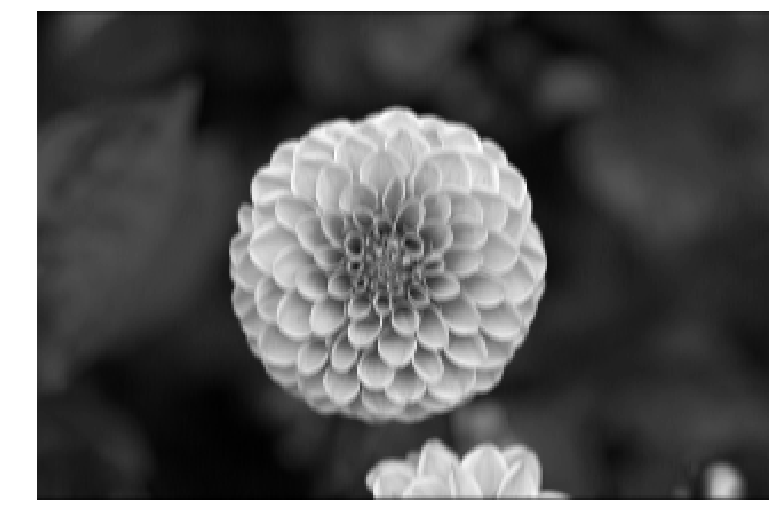

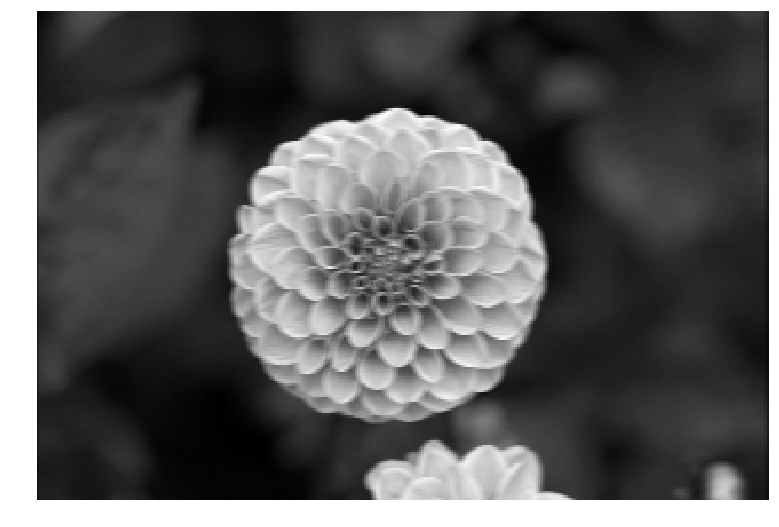

In [29]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

In [30]:
reset_graph()

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(
    X, filters=2, kernel_size=7, strides=[2, 2], padding='SAME')

In [31]:
init = tf.global_variables_initializer()

with tf.Session() as s:
    init.run()
    output = s.run(conv, feed_dict={ X: dataset })

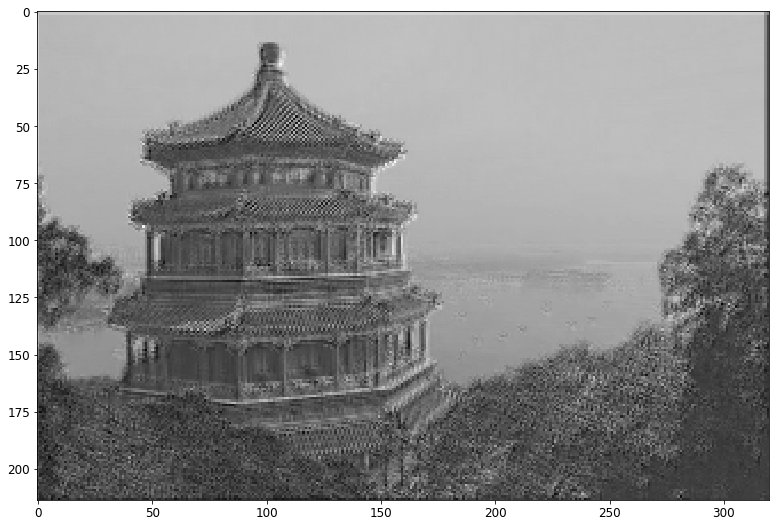

In [32]:
# plot 1st image's 2nd feature map
plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()

## Pooling Layer

In [33]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

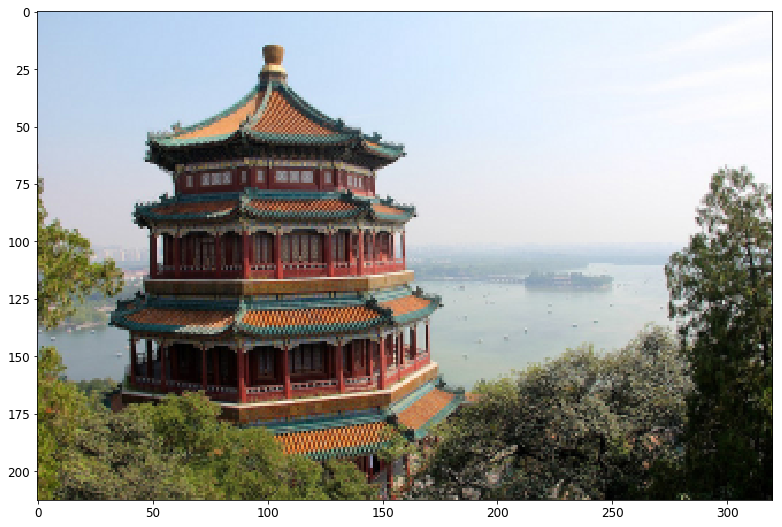

In [44]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
avg_pool = tf.nn.avg_pool(
    X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

with tf.Session() as s:
    output = s.run(avg_pool, feed_dict={ X: dataset })

plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()

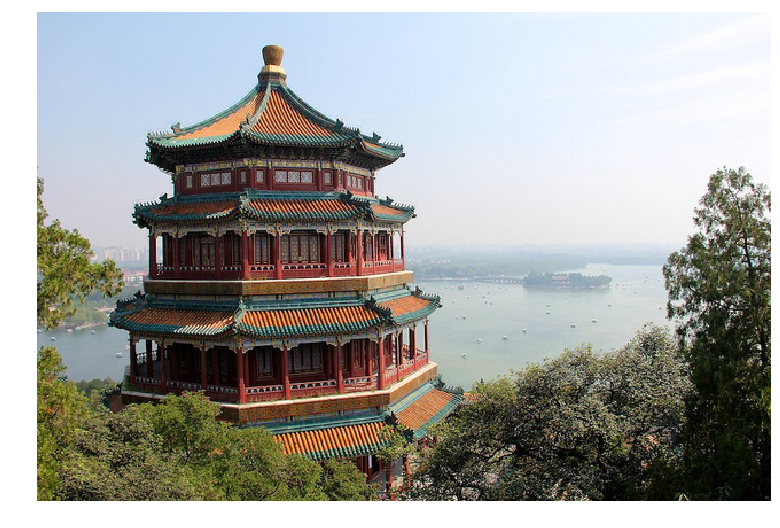

In [45]:
plot_color_image(dataset[0]) # original